In [10]:
!ls -l Jingjing/kmeans/100case*/* | head -n 2

-rw-r--r-- 1 seff-34c2f0d3dcc620-a916a00b641d users   54873981 Aug 22 23:43 Jingjing/kmeans/100cases.parquet/part-00000-53257ffd-2b5e-4a5c-aa06-37dcd2deac4b.snappy.parquet
-rw-r--r-- 1 seff-34c2f0d3dcc620-a916a00b641d users   50403069 Aug 22 23:43 Jingjing/kmeans/100cases.parquet/part-00001-53257ffd-2b5e-4a5c-aa06-37dcd2deac4b.snappy.parquet
ls: write error: Broken pipe


In [20]:
!ls MGH-TEST-100
!cat MGH-TEST-100/100Pt_tSNE_result.csv
!cat MGH-TEST-100/hello.txt

100Pt_tSNE_cost.csv  100Pt_tSNE_result.csv  hello.txt
newpHello, world

In [1]:
# README
### Dist-keras tSNE only works on python 2 ###


In [2]:
!pwd

/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work


In [9]:
from pandasql import sqldf
import pandas as pd
lidx=! ls MGH-100P
df_feats=pd.DataFrame(list(lidx),columns=['filenamep'])
df_feats['token']=df_feats.filenamep.str.extract('.*(Case.*)\.mat',expand=True)
#df_feats['token']=df_feats.token.str.rstrip(2)
print(sqldf("""
select * from df_feats where token like '%Case4%'
"""))
#print(df_feats)



ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



AttributeError: 'tuple' object has no attribute 'filename'

In [5]:
!pip install distkeras

  Could not find a version that satisfies the requirement distkeras (from versions: )
No matching distribution found for distkeras


In [8]:
import numpy as np

import time

import requests

from keras.optimizers import *
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from pyspark import SparkContext
from pyspark import SparkConf

from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

from distkeras.trainers import *
from distkeras.predictors import *
from distkeras.transformers import *
from distkeras.evaluators import *
from distkeras.utils import *

ImportError: No module named distkeras.trainers

In [12]:
readin="Jingjing/kmeans/100cases.parquet"
#ibasename=os.path.basename(elt)


all_cases= spark.read.option("header", False).\
    option("inferSchema","true").\
    parquet(readin)



In [13]:
# test
#all_cases.where(all_cases["573"] == 0.0).take(1)

all_cases.take(1)
cnt=all_cases.count()
print('100cases',cnt)

[Row(0=1.5460450802357033, 1=0.8975426759644767, 2=0.9999477975167612, 3=1.9658003040427148, 4=1.5524409341683034, 5=0.8873001677428605, 6=0.9964424843693146, 7=1.9618796781022738, 8=1.4781190166277614, 9=0.8697363059223104, 10=0.982741452126549, 11=1.8736020158660789, 12=1.2888573909631382, 13=0.785295044772921, 14=0.9363383197615264, 15=1.77227495863607, 16=3.644823173442287, 17=3.5645464398625317, 18=3.9216454442191466, 19=3.651367626918796, 20=3.215520365032301, 21=3.0202693739040436, 22=2.7899909673153527, 23=3.1551423622098507, 24=3.357335473455788, 25=3.1003317654201736, 26=2.764346851017269, 27=3.310613201401247, 28=2.8548461876951348, 29=3.1780632443433583, 30=3.2704329790918067, 31=3.720938812643101, 32=29068.81095990603, 33=19595.14165585709, 34=21162.82592287759, 35=26483.710918103192, 36=18034.41804282747, 37=11839.062981488856, 38=12867.066807015652, 39=16851.89956146464, 40=10530.277493033778, 41=6681.710795649397, 42=7560.641195708487, 43=10084.598575518898, 44=3318.710

In [28]:
# 
df_feats=all_cases.withColumns('normFeatures').toPandas()

print(df_feats)

TypeError: 'Column' object is not callable

In [2]:
# load data
def setHadoopConfig():
    name= "keystone"
    prefix = "fs.swift2d.service." + name
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + '.auth.url', 'https://identity.open.softlayer.com'+'/v3/auth/tokens')
    hconf.set(prefix + '.auth.endpoint.prefix', 'endpoints')
    hconf.set(prefix + '.tenant', 'a9fb4d478e3d40a8bbd54c5a2ecf25a3')
    hconf.set(prefix + '.username', '6a4cc8251c1940179a6cccc9098a15e0')
    hconf.set(prefix + '.password', 'kDTcKA2H(3eo5.G0')
    hconf.setInt(prefix + '.http.port', 8080)
    hconf.set(prefix + '.region', 'dallas')
    hconf.setBoolean(prefix + '.public', False)

name = "keystone"
setHadoopConfig()



In [ ]:
seven_cases = spark.read.parquet("swift2d://MGH." + name + "/tempParq/7cases.parquet")

In [3]:
one_case = spark.read.parquet("swift2d://MGH." + name + "/tempParq/case1.parquet")

In [4]:
sz7_cases = spark.read.parquet("swift2d://MGH." + name + "/tempParq/sz7cases.parquet")

In [27]:
sz22_cases = spark.read.parquet("swift2d://MGH." + name + "/tempParq/sz22_cases.parquet")

In [48]:
sz22_cases.count()

290404

In [71]:
sz12_cases = spark.read.option("inferSchema",True).parquet("Jingjing/norm/sz12_cases.parquet")

In [ ]:
# Normalization
# call in normalzation - done in other pipeline


In [ ]:
# tsne module
%load_ext wurlitzer
# training tSNE - performance tweaked
# TSNE calculation
import numpy as np
import datetime
from MulticoreTSNE import MulticoreTSNE as TSNE

def func_tsne(rdd_data):
    n_cores=48
    perplexity = 30
    n_iter=4500

    st=datetime.datetime.now()
    try:
        data=np.array(rdd_data[1])
        # TODO: To add attributes
        fid=''    
    
        # default - n_iter=1000, perplexity=30, theta=0.5
        tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

        X_2d = tsne.fit_transform(data)
        n_components=X_2d.shape
    except:
        X_2d=[]
        n_components=(0,0)
    
    ed=datetime.datetime.now()
    dur=ed-st
    return (st,ed,dur,X_2d,n_cores,n_components)

In [66]:
#sz22_cases
from pyspark.sql.functions import collect_list
import numpy as np
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql.functions import udf

#!ls Jingjing/norm

lfiles=!ls Jingjing/norm
#lfiles=list(lfiles)
for elt in list(lfiles)[0:2]:
    print(elt)

lpd11_cases.parquet
lpd12_cases.parquet


In [112]:
import numpy as np
#print(d_tsneRddRes)
#df_tsne=pd.DataFrame(d_tsneRddRes)

#na=[]
#df_tfile=pd.concat([pd.DataFrame(e) for e in df_tsne[3]])
#print(df_tsne[3])

print(d_tsneRddRes)
df_tsne=pd.DataFrame(d_tsneRddRes)
df_tsne_pts=pd.concat([pd.DataFrame(e) for e in df_tsne[3]])

#print(df-tsn)
#print(df_tsne[3])
ibasename=os.path.basename(elt)
print(ibasename+'_tsne.csv')
print(len(df_tsne_pts))
df_tsne_pts.to_csv(ibasename+'_tsne.csv',index=False)

[(datetime.datetime(2017, 8, 9, 10, 23, 49, 98749), datetime.datetime(2017, 8, 9, 10, 26, 23, 431858), datetime.timedelta(0, 154, 333109), array([[ 40.12033731, -17.73486216],
       [ 41.81148933, -23.23329226],
       [ 36.38617072, -10.44699775],
       ..., 
       [  1.52735761, -64.47279792],
       [ 10.40339773, -65.6783324 ],
       [  9.61848586, -61.54967055]]), 48, (9365, 2)), (datetime.datetime(2017, 8, 9, 10, 23, 49, 904123), datetime.datetime(2017, 8, 9, 10, 26, 0, 846109), datetime.timedelta(0, 130, 941986), array([[ 36.03612315, -21.92035008],
       [ 31.33429821, -35.26241486],
       [  8.3582018 , -40.16034323],
       ..., 
       [  4.94069393,  23.22941144],
       [  9.20258079,  24.02741461],
       [ 19.46266235,  26.2749162 ]]), 48, (10659, 2)), (datetime.datetime(2017, 8, 9, 10, 26, 29, 929383), datetime.datetime(2017, 8, 9, 10, 28, 44, 497402), datetime.timedelta(0, 134, 568019), array([[-24.22075543,  33.41996   ],
       [ -0.2519572 ,  50.25531016],
   

In [157]:
import numpy as np
print(group_size)
num_takes=int(np.floor(icases.count()/group_size))
print(icount)
print(num_takes)

100000
51878
0


In [14]:
#!find Jingjing/normalized/*.parquet -type d

In [149]:
#for elt in list(lfiles)[0:2]:
d_tsneRddRes=[]

def process(elt):
    d=os.getcwd()
    return d

print(lfiles)
lfiles=!find Jingjing/normalized/*.parquet -type d
lfiles=[os.path.basename(e) for e in list(lfiles)]

fileRdd=sc.parallelize(lfiles)
testRdd=fileRdd.foreach(process)
testRddRes=testRdd.collect()
print(testRddRes)

['lpd11_cases.parquet', 'lpd12_cases.parquet', 'lpd13_cases.parquet', 'lpd14_cases.parquet', 'lpd15_cases.parquet', 'lpd17_cases.parquet', 'lpd18_cases.parquet', 'lpd20_cases.parquet', 'lpd2_cases.parquet', 'lpd3_cases.parquet', 'lpd5_cases.parquet', 'lpd6_cases.parquet', 'lpd7_cases.parquet', 'lpd8_cases.parquet', 'lpd9_cases.parquet', 'sz100_cases.parquet', 'sz10_cases.parquet', 'sz11_cases.parquet', 'sz12_cases.parquet', 'sz13_cases.parquet', 'sz14_cases.parquet', 'sz15_cases.parquet', 'sz16_cases.parquet', 'sz17_cases.parquet', 'sz18_cases.parquet', 'sz19_cases.parquet', 'sz1_cases.parquet', 'sz20_cases.parquet', 'sz22_cases.parquet', 'sz23_cases.parquet', 'sz24_cases.parquet', 'sz25_cases.parquet', 'sz26_cases.parquet', 'sz27_cases.parquet', 'sz28_cases.parquet', 'sz29_cases.parquet', 'sz2_cases.parquet', 'sz30_cases.parquet', 'sz31_cases.parquet', 'sz32_cases.parquet', 'sz33_cases.parquet', 'sz34_cases.parquet', 'sz35_cases.parquet', 'sz36_cases.parquet', 'sz37_cases.parquet', 's

AttributeError: 'NoneType' object has no attribute 'collect'

In [ ]:
from pyspark.sql import functions as F
elt='sz5_cases_2.parquet'
readin="Jingjing/normalized/"+elt
ibasename=os.path.basename(elt)

#print(readin,ibasename)
# read cases
icases= spark.read.option("header", False).parquet(readin)
p_i_count=icases.count()

#i_cases.printSchema()

df=icases.select("normFeatures")
dfrdd=df.rdd
#dfrdd.show(10000)
print(df.rdd.collect())

#df.select(df.card_key,F.when((df.tran_sponsor == 'GAMES') &  (df.location_code == '9145'),'ENTERTAINMENT').when((df.tran_sponsor == 'XYZ') &  (df.location_code == '123'),'eBOOKS').when((df.tran_sponsor == 'XYZ') &  (df.l_code.isin(['123', '234', '345', '456', '567', '678', '789', '7878', '67', '456']) ),'FINANCE').otherwise(df.tran_sponsor)).show()
print(df_feats.count())
df
df_feats.show(50000)

In [56]:
num_pack=df_pack.count()
print('# pack',num_pack)

#d_lrdd=df_pack.rdd
#d_lrdd.cache()

# test
#d_tsneRdd=d_lrdd.map(lambda e: func_tsne(e))
##d_tsneRdd=d_lrdd.map(lambda e: func_test(e))
#d_tsneRdd.cache()
##print('map')
udf_tsne=udf(func_test,DoubleType())

d_tsne = df_pack.withColumn("tsne",udf_tsne('split_frames'))
d_tsne.cache()
# REVIEW: Area the points in order
#d_tsneRes=d_tsneRdd.take(num_pack)
df_tsne_pts=d_tsne.take(num_pack)

# pack 5


Py4JJavaError: An error occurred while calling o2448.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 58 in stage 403.0 failed 10 times, most recent failure: Lost task 58.9 in stage 403.0 (TID 7824, yp-spark-dal09-env5-0031, executor 79fb030a-7d9e-406f-a61a-817f3287a63b): net.razorvine.pickle.PickleException: expected zero arguments for construction of ClassDict (for numpy.core.multiarray._reconstruct)
	at net.razorvine.pickle.objects.ClassDictConstructor.construct(ClassDictConstructor.java:23)
	at net.razorvine.pickle.Unpickler.load_reduce(Unpickler.java:707)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:175)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:99)
	at net.razorvine.pickle.Unpickler.loads(Unpickler.java:112)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:156)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:155)
	at scala.collection.Iterator$$anon$12.nextCur(Iterator.scala:434)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at org.apache.spark.sql.execution.columnar.InMemoryRelation$$anonfun$1$$anon$1.hasNext(InMemoryRelation.scala:138)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:215)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:964)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:955)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:895)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:955)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:701)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:337)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.lang.Thread.run(Thread.java:785)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1442)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1430)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1429)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1429)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:803)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:803)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:803)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1657)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1612)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at java.lang.Thread.getStackTrace(Thread.java:1117)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:629)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1931)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1944)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1957)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:333)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply$mcI$sp(Dataset.scala:2745)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:2742)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:2742)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2765)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:2742)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:785)
Caused by: net.razorvine.pickle.PickleException: expected zero arguments for construction of ClassDict (for numpy.core.multiarray._reconstruct)
	at net.razorvine.pickle.objects.ClassDictConstructor.construct(ClassDictConstructor.java:23)
	at net.razorvine.pickle.Unpickler.load_reduce(Unpickler.java:707)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:175)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:99)
	at net.razorvine.pickle.Unpickler.loads(Unpickler.java:112)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:156)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:155)
	at scala.collection.Iterator$$anon$12.nextCur(Iterator.scala:434)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at org.apache.spark.sql.execution.columnar.InMemoryRelation$$anonfun$1$$anon$1.hasNext(InMemoryRelation.scala:138)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:215)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:964)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:955)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:895)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:955)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:701)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:337)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [ ]:
# debug one pipe

from pyspark.sql.types import DoubleType,StringType, DecimalType, IntegerType, LongType, StructType, StructField
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, Normalizer, PCA, StandardScaler, MinMaxScaler
from pyspark.sql.functions import lit, when, udf
from pyspark.ml.clustering import KMeans
import pandas as pd
import numpy as np


elt='sz5_cases_2.parquet'
readin="Jingjing/normalized/"+elt
ibasename=os.path.basename(elt)

#print(readin,ibasename)
# read cases
icases= spark.read.option("header", False).parquet(readin)
p_i_count=icases.count()
#icases.show(1000)
#icases.show()
print('icases',icases.__class__,p_i_count)


# new mod
import pyspark.sql.functions as F
from pyspark.sql.functions import mean, min, max
from pyspark.sql.functions import var_pop, var_samp, stddev, stddev_pop, sumDistinct, ntile
import math

def shift_mean(x,mean1,stddev1):
    #b=math.abs(x-mean1) > 3 * stddev1
    b=math.abs(x-mean1)
    return b


def test(x,a,b):
    return x

#%pdb
#for col in icases.schema:
#    if col.dataType == DoubleType():
#        print(col.name)
#        #if the column is of string type
#        #if the string cannot be converted to a number, make it 0, if it can, make it that number
#        
#        
#        mean1=icases.select(mean(col.name))
#        stddev1=icases.select(stddev(col.name))
#        print(mean1,stddev1.collect())
#        print(mean1,stddev1.collect())
#        print(mean1,stddev1.collect()[0])
#        print(mean1.__class__,stddev1[0])
#        #udf_shift_mean=F.udf(lambda x:test(x,mean1,stddev1),DoubleType())
        
        #icases = icases.withColumn(col.name + "temp", udf_shift_mean(icases[col.name],5).cast(DoubleType()))
        #print('new')
        #icases = icases.drop(col.name).withColumnRenamed(col.name + "temp",col.name)
        
        
#import numpy as np
#all_cases = all_cases.replace(float(np.nan), 0)

icases=icases.na.fill(0)

            
feature_cols = icases.columns
#print(feature_cols)
#feature_cols = filter(feature_cols,lambda x: (x != "timeId" & x != "patId"))
feature_cols=[str(e) for e in range(0,576)]
print('feature_cols',feature_cols)
#feature_cols=all_cases.columns

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features2")
icases = assembler.transform(icases) 


#
icases=icases.withColumn('idx',monotonically_increasing_id())
#icases=icases.take(1000)

# slice
#icases=icases.select('features','normFeatures','1','2','3').filter(icases.idx < 2000)


#print(icases)
print(icases.count())



# normalize
scaler = StandardScaler(inputCol="features2", outputCol="scaledFeatures", withStd=True, withMean=True)
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(icases)
# Normalize each Train feature to have unit standard deviation.
icases = scalerModel.transform(icases)


scaler = MinMaxScaler(inputCol="features2", outputCol="minmaxFeatures")
# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(icases)
# rescale each feature to range [min, max].
icases = scalerModel.transform(icases)

icases.show(500)

icases.registerTempTable("icases")
#icases=spark.sql("SELECT ROUND(*) as FROM icases")

icases=icases.filter(icases.idx < 10000)

#icases.show(1000)
#icases=icases.select('features','normFeatures','scaledFeatures','1','2','3','4','5').filter(icases.idx < 2000)
#df.registerTempTable("icases")
#imax=spark.sql("SELECT * FROM icases").collect()[0].asDict()['maxval']
#imax=icases.select(max("scaledFeatures")).collect()[0].asDict()['max(scaledFeatures)']
#imax.show(50)
#icases.show(600)

#i_cases.select('minmaxFeatures').show(10000)

# pca
#pca = PCA().setInputCol("scaledFeatures").setOutputCol("pcaFeatures").setK(200)
pca = PCA(inputCol='minmaxFeatures',outputCol="pcaFeatures")
pca=pca.setK(100)
pcaModel=pca.fit(icases)
icases = pcaModel.transform(icases)


icases = icases.cache()

# kmeans
#icases.select('pcaFeatures').show(1000)




print(icases.schema.names)
d_cases = icases.select(["normFeatures", "timeId", "patId"])


d_cases = d_cases.withColumn("rowid", monotonically_increasing_id())
p_count=d_cases.count()
#print('d_cases',d_cases.__class__,p_count)

group_size=1000
def _udf_group(e):
    return int(np.floor(e/group_size))

print(p_i_count,p_count,group_size)

# Define the UDF
udf_group = udf(_udf_group, IntegerType())

# Convert a whole column to uppercase with a UDF.
d_cases = d_cases.withColumn("group_id", udf_group("rowid"))

print('DF group')
d_cases.show(100)

df_pack=(d_cases.groupBy("group_id")
 .agg(collect_list("normFeatures").alias("split_frames")))

d_cases.printSchema()

num_pack=df_pack.count()
print('# pack',num_pack)

#d_lrdd=df_pack.rdd
#d_lrdd.cache()

# test
#d_tsneRdd=d_lrdd.map(lambda e: func_tsne(e))
##d_tsneRdd=d_lrdd.map(lambda e: func_test(e))
#d_tsneRdd.cache()
##print('map')
udf_tsne=udf(func_test,DoubleType())

d_tsne = df_pack.withColumn("tsne",udf_tsne('split_frames'))
d_tsne.cache()
# REVIEW: Area the points in order
#d_tsneRes=d_tsneRdd.take(num_pack)
df_tsne_pts=d_tsne.take(num_pack)

print('full tsne RDD')
#print(d_tsneRddRes)
#df_tsne=pd.DataFrame(d_tsneRes)
#df_tsne_pts=pd.concat([pd.DataFrame(e) for e in df_tsne[3]])


print('size of df',len(df_tsne_pts))

In [ ]:
# examine outputs
# input, output
#!mkdir Jingjing/tsne

sqlCtx = SQLContext(sc)
sdf=sqlCtx.createDataFrame(df_tsne_pts)
#sdf.show()
filep='lrda2'
try:
#print(df_tsne_pts)
    print('saving',filep)
    #df_tsne_pts.to_csv('test.csv',index=False)
    sdf.write.mode("overwrite").csv("Jingjing/tsne/"+filep+"_tsne.csv")
except:
    print('trouble saving')


In [ ]:
!mv *_tsne.csv tsne_pts/*

In [15]:
!ls tsne_pts/*

tsne_pts/1case_feats.csv       tsne_pts/case1_seg12_20170804161055.csv
tsne_pts/7cases_feats.csv      tsne_pts/lpd3_cases.parquet_tsne.csv
tsne_pts/7cases_tsne_4500.csv  tsne_pts/lrda2_cases.parquet_tsne.csv


In [19]:
!ls -l *.csv

!cat stats_consts.csv | head -n 2

-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users 1652031488 Jul  6 14:53 Case1_seg11.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users   14832768 Jul 11 13:07 Case1_seg12.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users 7224415855 Jul  6 11:34 Case3_seg1.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users   38310695 Aug 18 22:07 cluster_pts.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users    2510539 Aug  1 14:12 GoSales_Tx_NaiveBayes.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users     758688 Aug  9 15:36 lpd2_cases.parquet_tsne.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users     430649 Aug  9 21:17 lpd3_cases.parquet_tsne.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users    1161457 Aug  9 11:51 l_tsne.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users      23279 Jul 16  1990 pima-indians-diabetes.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users      32912 Aug 30 21:44 stats_consts.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b

In [23]:
!pip install pandas

In [1]:
!pip install dist-keras

    100% |████████████████████████████████| 6.2MB 194kB/s eta 0:00:01
    100% |████████████████████████████████| 890kB 1.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.cache/pip/wheels/6f/85/6c/56b8e1292c6214c4eb73b9dda50f53e8e977bf65989373c962
Successfully built html5lib


In [3]:
# load tsne
import pandas as pd
df_tsne=pd.read_csv('tsne_pts/7cases_tsne_4500.csv',header='infer')

In [16]:
import numpy
# normalization
#print(df.withColumn(['_c1','feat_1']).show())
print(numpy.__version__)


seven_cases.select("prediction").distinct().count()
(seven_cases
    .withColumn(["prediction","normFeatures"],['prediction','features'])
    #.withColumn("normFeatures", 'features')
    #.withColumn("new_column_3", new_column_3)
)

seven_cases.select("prediction").distinct().show()
dist=seven_cases.select(["prediction","features"]).distinct().toPandas()

print(dist)

1.11.0


AssertionError: col should be Column

In [ ]:
all_cases.take(3)

In [5]:
df_sz7cases = sz7_cases.select("normFeatures").toPandas()

In [144]:
one_case = spark.read.parquet("swift2d://MGH." + name + "/tempParq/case1.parquet")

In [30]:
# # iterate - df_sz22 = index, mono_id

df_sz22cases=sz22_cases.select("normFeatures").toPandas()

In [ ]:
# Write data into object store
import swiftclient

# Copy to cyberduck Store
objStorCred = {
  "auth_url": "https://identity.open.softlayer.com",
  "project": "object_storage_20ff227d_d66c_495a_a316_cd99e80a9e6f",
  "projectId": "a9fb4d478e3d40a8bbd54c5a2ecf25a3",
  "region": "dallas",
  "userId": "6a4cc8251c1940179a6cccc9098a15e0",
  "username": "admin_fd35793e7cf915d9a5a9c768b068029cf6d720b9",
  "password": "kDTcKA2H(3eo5.G0",
  "domainId": "a350f0fe7fb44571b29305706a12c95a",
  "domainName": "1334933",
  "role": "admin"
}
conn = swiftclient.Connection(auth_version='3',key=objStorCred['password'],
                          authurl=objStorCred['auth_url']+'/v3',
                         os_options={"project_id":objStorCred['projectId'],
                                   "user_id":objStorCred['userId'],
                                   "region_name":objStorCred['region']})
#if not os.path.isfile(os.path.basename(fileName0)):

absdir='/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/'
dirn='tsne_pts'
import glob
for fileName0 in glob.glob(absdir+dirn+'/*tsne*.csv'):
    print('move',fileName0,os.path.getsize(fileName0))
    if os.path.isfile(fileName0):
        
        basename0=os.path.basename(fileName0)
        
        print('writing to local',fileName0,basename0)

        container = 'MGH/Jingjing/TSNE'
        with open(fileName0,'rb') as local:
            #print(local.read())
            resp=conn.put_object(container, basename0,local.read(),content_type='text/plain')
        
        print(resp)
        #with open(os.path.basename(fileName0), 'wb') as local:
        #with open(fileName0, 'wb') as local:
        #    local.write(obj_contents)

In [ ]:
import pandas as pd

def func_save_bucket(elt):
    ""
    data=elt[0][3]
    
    #put_obj_stor(data)
    dirp=''+s
    #container='MGH'+name+'/JingjingTSNE/'+ptid+'_'+segid+'_'+s+'.csv'
    df=pd.DataFrame(data)
    
    absdir='/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/'
    outp=absdir+'tsne_pts/'+fid+'_'+s+'.csv'
    #
    
    df.to_csv(outp,index=False)
    #print(data,container)
    
    
if __name__ == '__main__':
    ""
    fid='sz22'
    s=datetime.datetime.now().strftime('%Y%m%d%H%M%S')
    
    
    #resRdd=tsneRdd.flatMap(lambda e: e[3])
    #res=resRdd.collect()
    
    
    func_save_bucket(e)

In [25]:
import pandas as pd

def func_save_bucket(elt):
    ""
    data=elt[0][3]
    
    #put_obj_stor(data)
    dirp=''+s
    #container='MGH'+name+'/JingjingTSNE/'+ptid+'_'+segid+'_'+s+'.csv'
    df=pd.DataFrame(data)
    
    absdir='/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/'
    outp=absdir+'tsne_pts/'+fid+'_'+s+'.csv'
    df.to_csv(outp,index=False)
    #print(data,container)
    
    
if __name__ == '__main__':
    ""
    fid='sz22'
    s=datetime.datetime.now().strftime('%Y%m%d%H%M%S')
    func_save_bucket(e)
    
    resRdd=tsneRdd.flatMap(lambda e: e[3])
    res=resRdd.collect()   
    

NameError: name 'container' is not defined

In [26]:
!ls tsne_pts/*.csv

tsne_pts/1case_feats.csv   tsne_pts/7cases_tsne_4500.csv
tsne_pts/7cases_feats.csv  tsne_pts/case1_seg12_20170804161055.csv


In [7]:
# Load training data
# Stats
print(df_tsne.head(5))
print(len(df_tsne))

           0          1
0  49.037846  18.109972
1  28.797851  15.436342
2  50.780130  18.481422
3  58.898441  19.109565
4  54.320004  21.323596
247625


In [ ]:
# Load raw data


In [19]:
import numpy as np

X_train_m=np.array(df_cases.ix[0:300,'normFeatures'].map(np.array))
X_train_m=df_cases.ix[0:300,'normFeatures'].map(np.array)

In [81]:
from numpy import floor
from keras.datasets import mnist
#print(df_cases)

x_shape=(df_cases['normFeatures']).shape
y_shape=(df_cases['prediction']).shape

num_test=int(floor(0.1 * x_shape[0]))
#batch_size = 5000
#
%time (X_train_a, y_train_a), (X_test_a, y_test_a) = mnist.load_data()

print(y_train_a.shape,X_train_a.shape)

#print(num_test,x_shape[0])

y_train=df_cases['prediction'][:-num_test]
y_test=df_cases['prediction'][-num_test:]

X_train=df_cases['pcaFeatures'][:-num_test]
X_test=df_cases['pcaFeatures'][-num_test:]

# X_train = X_train.reshape(-1, 784)
# X_test = X_test.reshape(-1, 784)
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255


print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')
#print(np.array(X_train.iloc[:]))

print(X_train_a.__class__)
X_train_m=X_train.as_matrix()

print(X_train_m.__class__)

CPU times: user 290 ms, sys: 14 ms, total: 304 ms
Wall time: 302 ms
(60000,) (60000, 28, 28)
(222863,) train samples
(24762,) test samples
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
!pip install dask
!pip install pandas

In [2]:
#!pip install wurlitzer

In [61]:
print(sz7_cases.__class__)

sz7_cases.createOrReplaceTempView("sz7_cases")

#df=sz7_cases.rdd.partitionBy(10)


#sc.sql("SELECT * FROM sz7_caeses")
#print(df.take(1))
#df with 10 partitions
df_parts=sz7_cases.rdd.repartition(20) 

print(sz7_cases.rdd.__class__)
print(sz7_cases.rdd.count())

print(df_parts.getNumPartitions())
#print(df_parts.rdd.getNumPartitions())

df_parts.partitionBy()

lrdd=df_parts.flatMap(func_test)

lrdd.take(3)

#rdd_parts=df_parts.rdd

#print(rdd_parts.count())

#print(sz7_cases.rdd.count())
    #.getNumPartitions()


#>>> df.coalesce(1).rdd.getNumPartitions() 
#df2 = spark.sql("SELECT * from sz7_cases")


#rddData2.createOrReplaceTempView("PredictedData")

#datardd=sz7_cases.mapPartition(10)



#outrdd=datardd.flatMap(func_test)



<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.rdd.RDD'>
1317457
20


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 37.0 failed 10 times, most recent failure: Lost task 0.9 in stage 37.0 (TID 3155, yp-spark-dal09-env5-0045, executor 35dc8e56-7c20-437c-af93-149c2db1bcb6): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/sql/types.py", line 1497, in __getattr__
    idx = self.__fields__.index(item)
ValueError: 'toDF' is not in list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/src/spark21master/spark/python/pyspark/rdd.py", line 1339, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-60-eeb26f27c9a3>", line 42, in func_test
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/sql/types.py", line 1502, in __getattr__
    raise AttributeError(item)
AttributeError: toDF

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.lang.Thread.run(Thread.java:785)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1442)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1430)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1429)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1429)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:803)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:803)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:803)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1657)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1612)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at java.lang.Thread.getStackTrace(Thread.java:1117)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:629)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1931)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1944)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1957)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:785)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/sql/types.py", line 1497, in __getattr__
    idx = self.__fields__.index(item)
ValueError: 'toDF' is not in list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/src/spark21master/spark/python/pyspark/rdd.py", line 1339, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-60-eeb26f27c9a3>", line 42, in func_test
  File "/usr/local/src/spark21master/spark-2.1.0-bin-2.7.3/python/lib/pyspark.zip/pyspark/sql/types.py", line 1502, in __getattr__
    raise AttributeError(item)
AttributeError: toDF

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [3]:
# inspect tsne data
print(X_2d.__class__, X_2d.shape,X_2d)

X_train=l
# Set batch size
batch_size=5000

print(X_2d[0,0],X_2d[0,1])
print(X_2d[:,0]) # X-coords
print(X_2d[:,1]) # Y-coords

NameError: name 'X_2d' is not defined

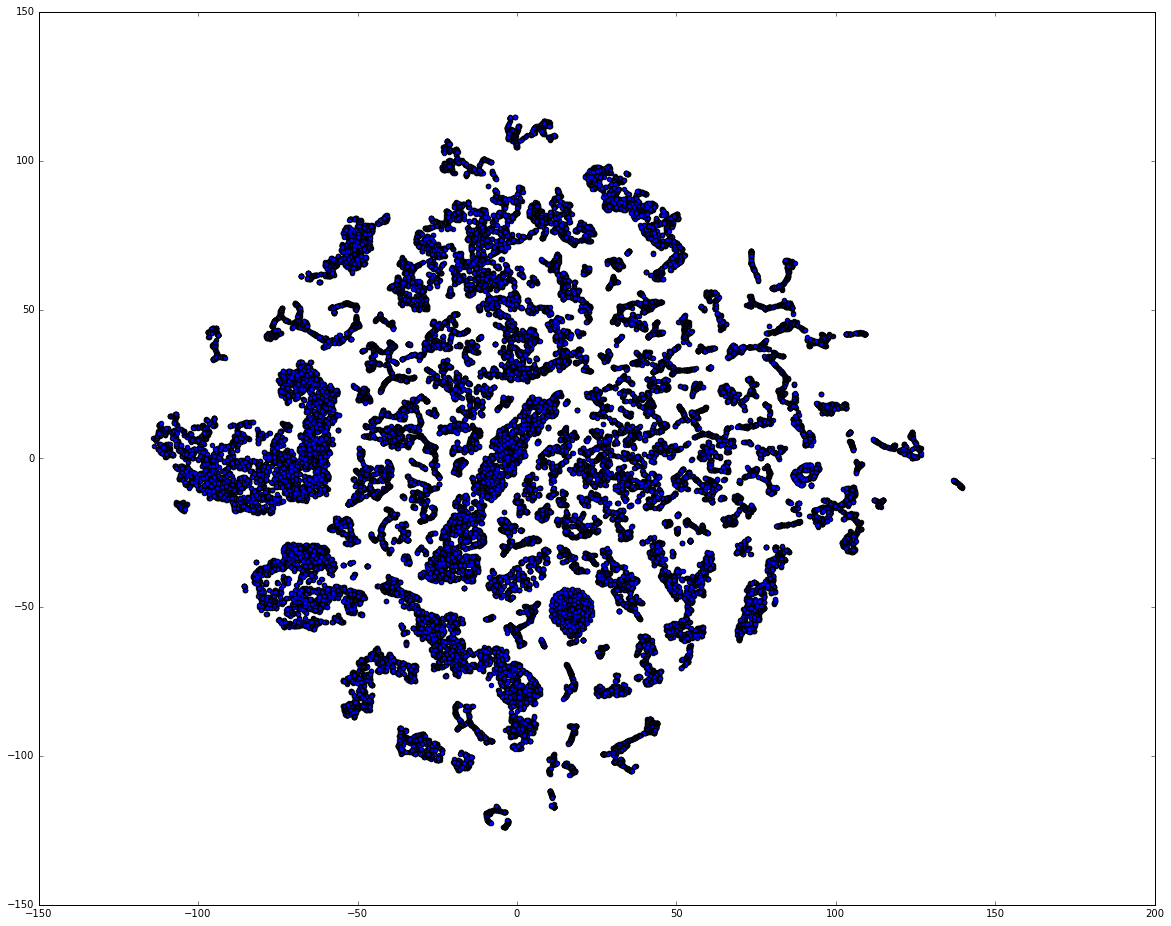

In [113]:
# visualization on tsne only - 3000 iteration 1 case

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d_case1_6000[:,0], X_2d_case1_6000[:,1])

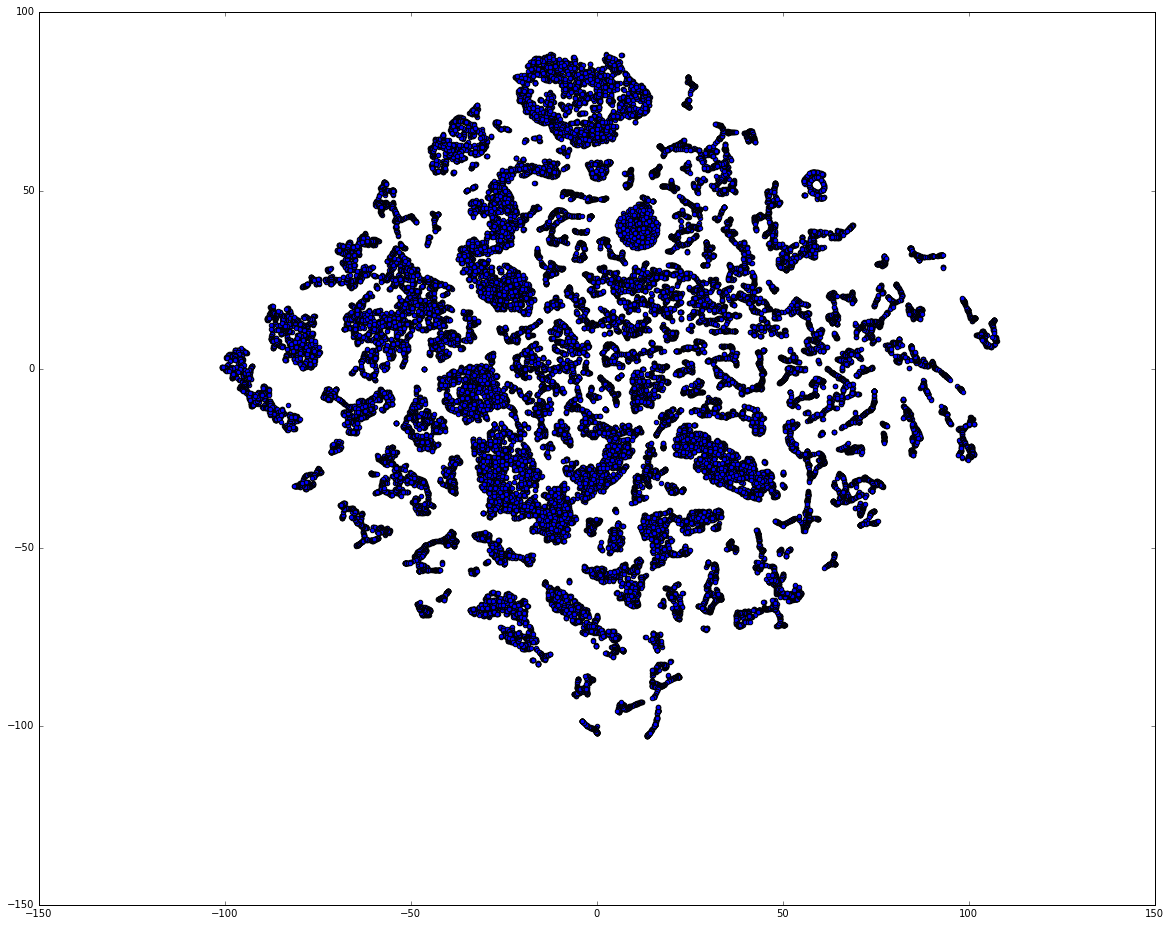

In [111]:
# visualization on tsne only - 3000 iteration 1 case

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d_case1[:,0], X_2d_case1[:,1])

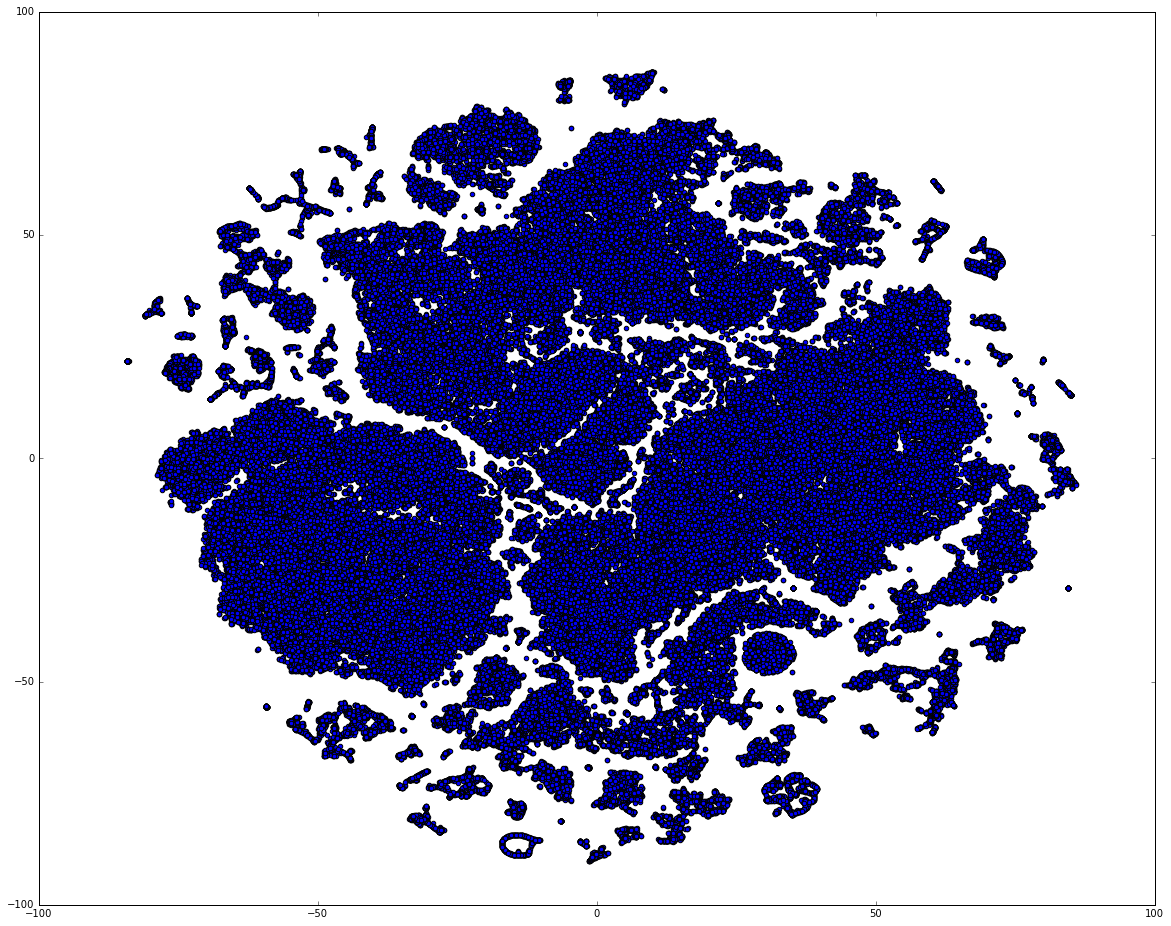

In [129]:
# visualization on tsne only - 5000 iterations - 50 perplexity

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d_4500[:,0], X_2d_4500[:,1])

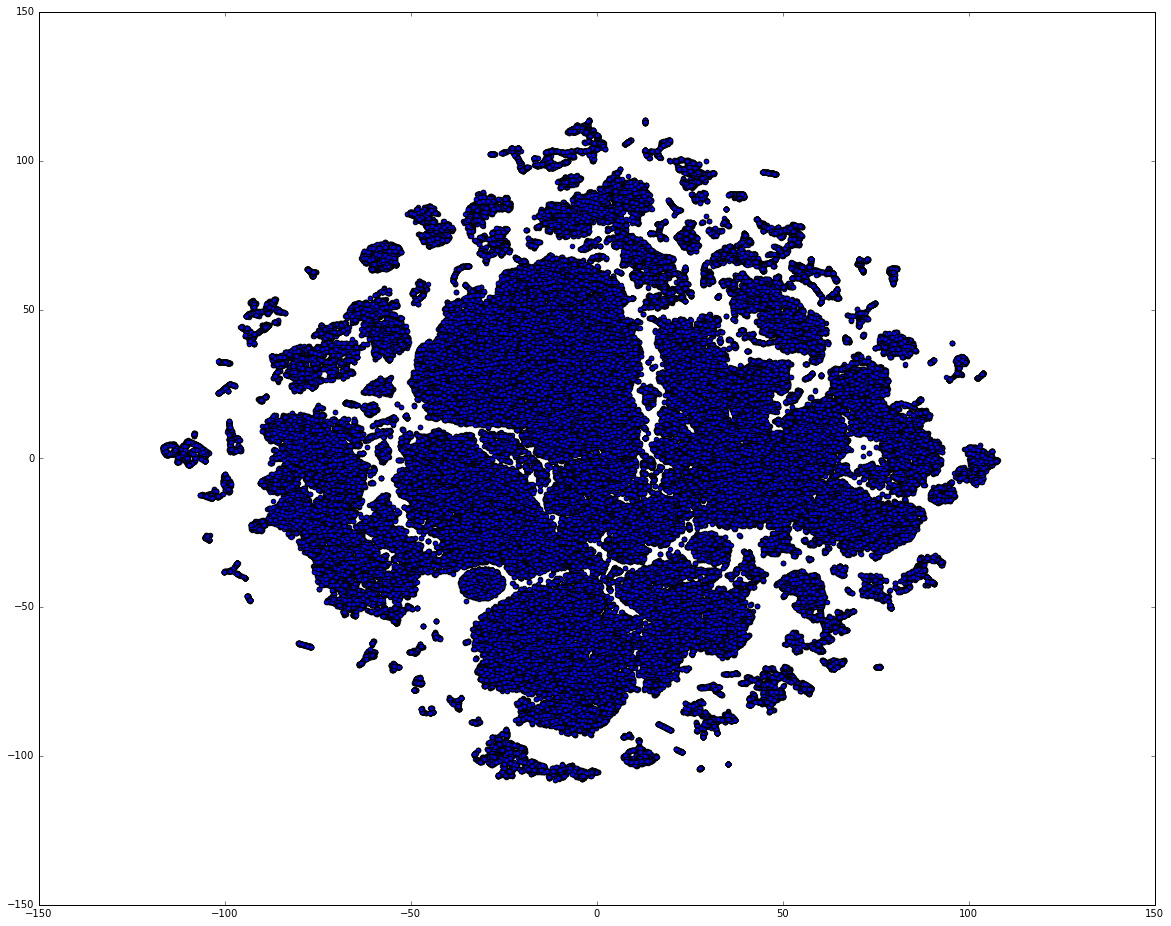

In [97]:
# visualization on tsne only - 5000 iterations - 50 perplexity

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d_3B[:,0], X_2d_3B[:,1])

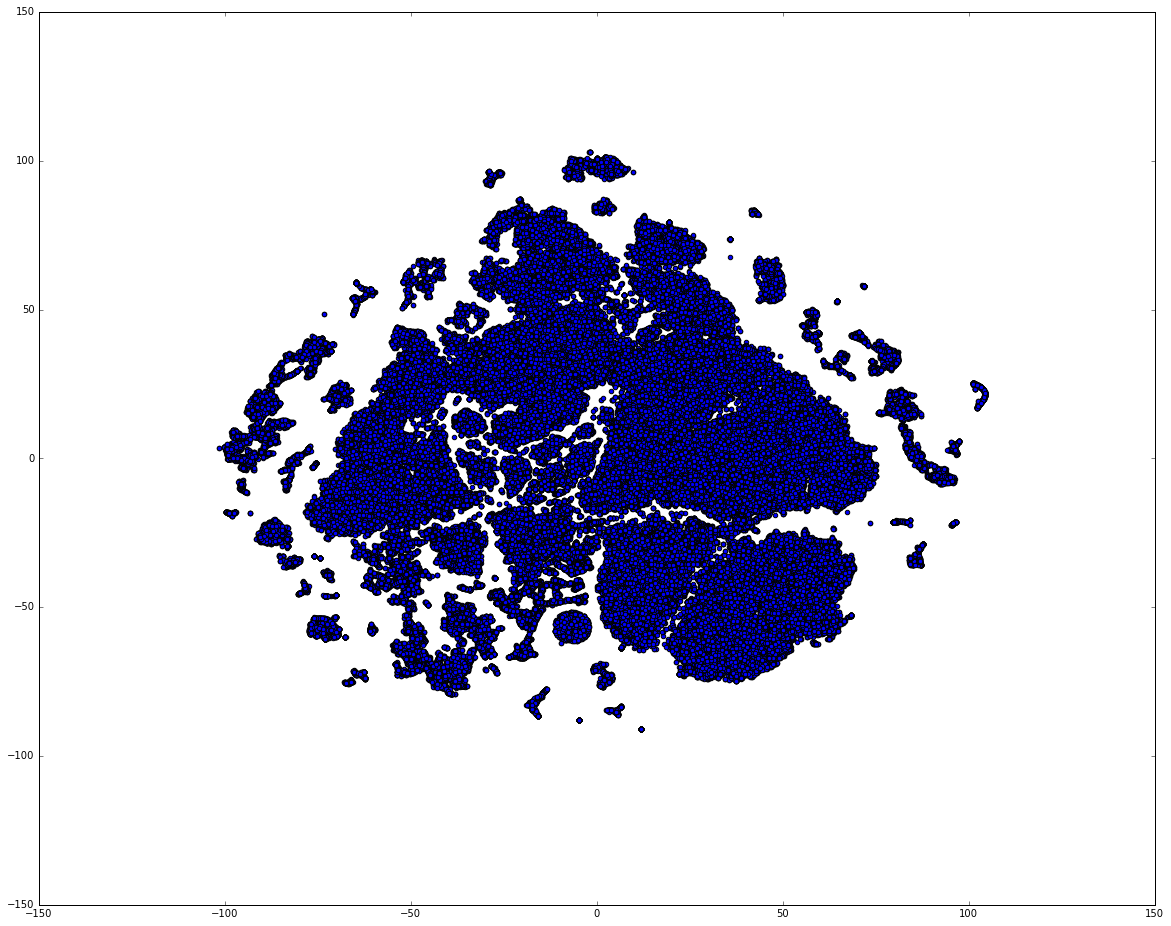

In [93]:
# visualization on tsne only - 5000 iterations - 50 perplexity

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d_3[:,0], X_2d_3[:,1])

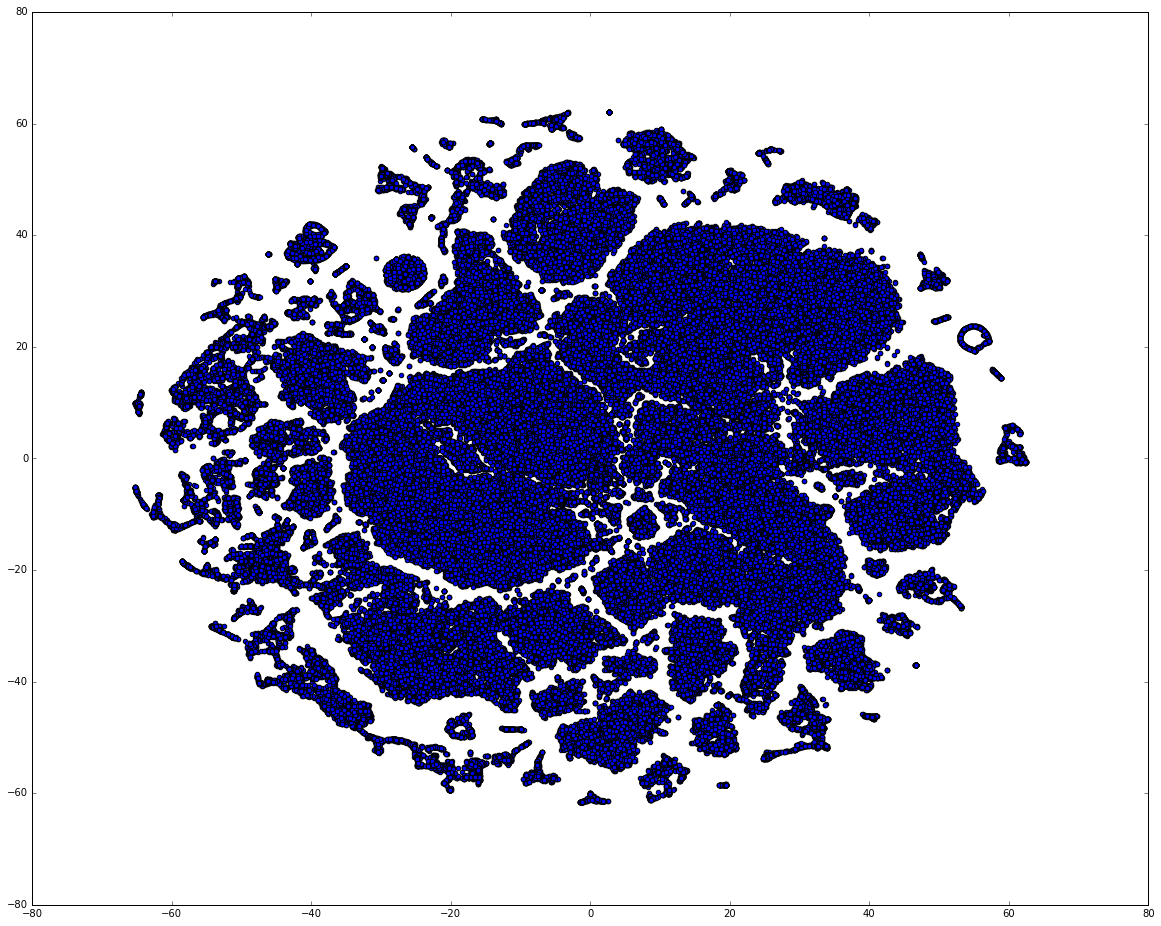

In [91]:
# visualization on tsne only - 3000 iterations

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d_2[:,0], X_2d_2[:,1])


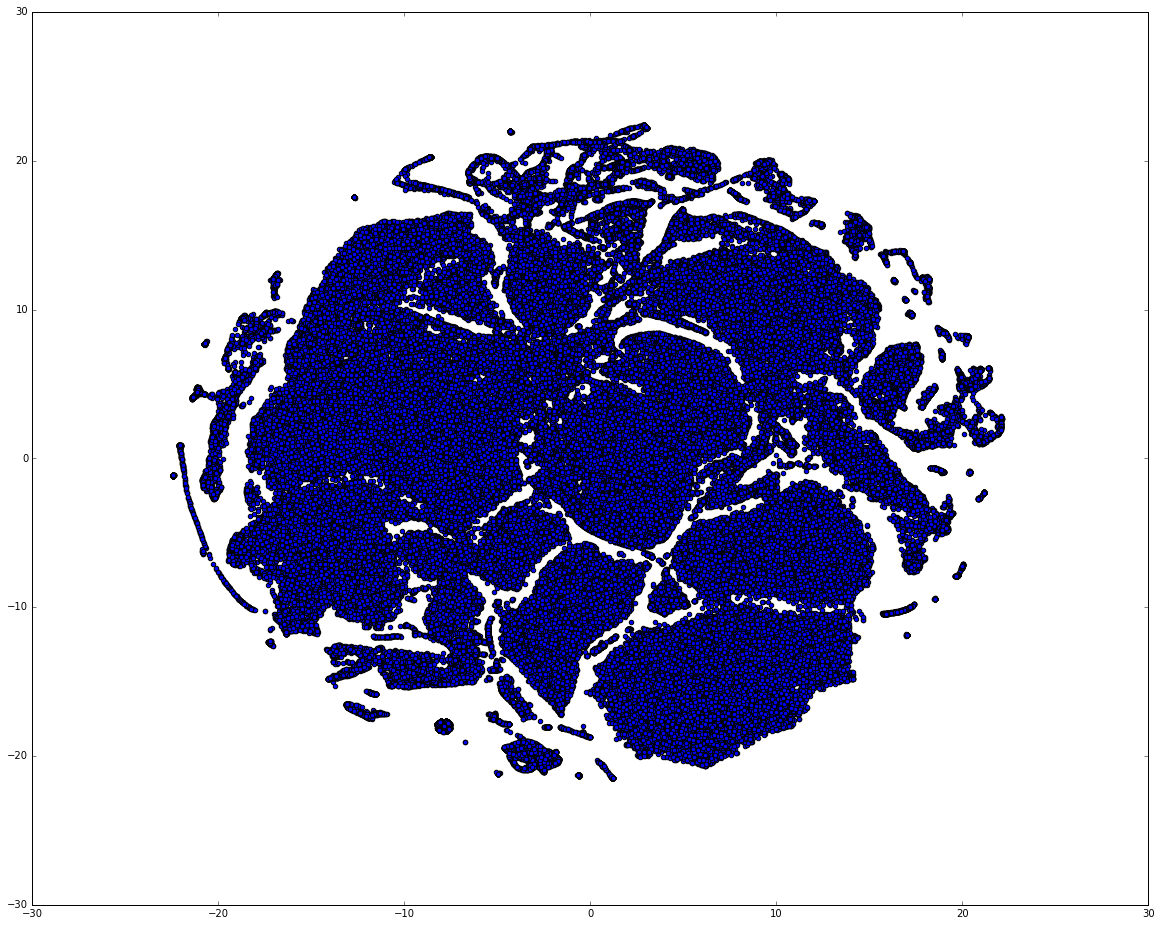

In [85]:
# visualization on tsne only - non-tweaked

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d[:,0], X_2d[:,1])


In [12]:
# var

import numpy as np
batch_size=3000


# funcs

# Building model
def Hbeta(D, beta):
    P = np.exp(-D * beta)
    sumP = np.sum(P)
    H = np.log(sumP) + beta * np.sum(np.multiply(D, P)) / sumP
    P = P / sumP
    return H, P

def x2p(X, u=15, tol=1e-4, print_iter=500, max_tries=50, verbose=0):
    # Initialize some variables
    n = X.shape[0]                     # number of instances
    P = np.zeros((n, n))               # empty probability matrix
    beta = np.ones(n)                  # empty precision vector
    logU = np.log(u)                   # log of perplexity (= entropy)
    
    # Compute pairwise distances
    if verbose > 0: print('Computing pairwise distances...')
    sum_X = np.sum(np.square(X), axis=1)
    # note: translating sum_X' from matlab to numpy means using reshape to add a dimension
    D = sum_X + sum_X[:,None] + -2 * X.dot(X.T)

    # Run over all datapoints
    if verbose > 0: print('Computing P-values...')
    for i in range(n):
        
        if verbose > 1 and print_iter and i % print_iter == 0:
            print('Computed P-values {} of {} datapoints...'.format(i, n))
        
        # Set minimum and maximum values for precision
        betamin = float('-inf')
        betamax = float('+inf')
        
        # Compute the Gaussian kernel and entropy for the current precision
        indices = np.concatenate((np.arange(0, i), np.arange(i + 1, n)))
        Di = D[i, indices]
        H, thisP = Hbeta(Di, beta[i])
        
        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while abs(Hdiff) > tol and tries < max_tries:
            
            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i]
                if np.isinf(betamax):
                    beta[i] *= 2
                else:
                    beta[i] = (beta[i] + betamax) / 2
            else:
                betamax = beta[i]
                if np.isinf(betamin):
                    beta[i] /= 2
                else:
                    beta[i] = (beta[i] + betamin) / 2
            
            # Recompute the values
            H, thisP = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1
        
        # Set the final row of P
        P[i, indices] = thisP
        
    if verbose > 0: 
        print('Mean value of sigma: {}'.format(np.mean(np.sqrt(1 / beta))))
        print('Minimum value of sigma: {}'.format(np.min(np.sqrt(1 / beta))))
        print('Maximum value of sigma: {}'.format(np.max(np.sqrt(1 / beta))))
    
    return P, beta

def compute_joint_probabilities(samples, batch_size=5000, d=2, perplexity=30, tol=1e-5, verbose=0):
    v = d - 1
    
    # Initialize some variables
    n = samples.shape[0]
    batch_size = min(batch_size, n)
    
    # Precompute joint probabilities for all batches
    if verbose > 0: print('Precomputing P-values...')
    batch_count = int(n / batch_size)
    P = np.zeros((batch_count, batch_size, batch_size))
    for i, start in enumerate(range(0, n - batch_size + 1, batch_size)):   
        curX = samples[start:start+batch_size]                   # select batch
        P[i], beta = x2p(curX, perplexity, tol, verbose=verbose) # compute affinities using fixed perplexity
        P[i][np.isnan(P[i])] = 0                                 # make sure we don't have NaN's
        P[i] = (P[i] + P[i].T) # / 2                             # make symmetric
        P[i] = P[i] / P[i].sum()                                 # obtain estimation of joint probabilities
        P[i] = np.maximum(P[i], np.finfo(P[i].dtype).eps)

    return P
print(batch_size)
print(X_train.shape)


3000
(60000, 28, 28)


In [13]:
# Compute probabilities

%time P = compute_joint_probabilities(X_train, batch_size=batch_size, verbose=2)

Precomputing P-values...
Computing pairwise distances...


ValueError: operands could not be broadcast together with shapes (3000,3000,28) (3000,28,28,3000) 

In [ ]:
# Save model
#!mkdir para_tsne
%time np.save('para_tsne/feats_P.npy', P)
# %time P = np.load('P.npy')

In [5]:
# Test Batch
from numpy import floor
from keras.datasets import mnist
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape,X_train.__class__,X_train[0,:,:])


(60000, 28, 28) <class 'numpy.ndarray'> [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   

In [ ]:
# P is the joint probabilities for this batch (Keras loss functions call this y_true)
# activations is the low-dimensional output (Keras loss functions call this y_pred)
def tsne(P, activations):
#     d = K.shape(activations)[1]
    d = 2 # TODO: should set this automatically, but the above is very slow for some reason
    n = batch_size # TODO: should set this automatically
    v = d - 1.
    eps = K.variable(10e-15) # needs to be at least 10e-8 to get anything after Q /= K.sum(Q)
    sum_act = K.sum(K.square(activations), axis=1)
    Q = K.reshape(sum_act, [-1, 1]) + -2 * K.dot(activations, K.transpose(activations))
    Q = (sum_act + Q) / v
    Q = K.pow(1 + Q, -(v + 1) / 2)
    Q *= K.variable(1 - np.eye(n))
    Q /= K.sum(Q)
    Q = K.maximum(Q, eps)
    C = K.log((P + eps) / (Q + eps))
    C = K.sum(P * C)
    return C

In [8]:
# tsne on input - Python 3.5 with Spark 1.6 only

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy


model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(500, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(2))

# SGD optimizer - 
sgd = SGD(lr=0.1)
%time model.compile(loss=tsne, optimizer=sgd)

model.summary()

CPU times: user 127 ms, sys: 113 ms, total: 240 ms
Wall time: 240 ms
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               14500     
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 4002      
Total params: 1,271,002
Trainable params: 1,271,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# retrain or reload

bSave=True
bLoad=False

if (bSave):
    %time np.save('X_2d.npy', X_2d)
    
if (bLoad):
    %time X_2d = np.load('X_2d.npy')

#print(X_2d.shape)

In [ ]:

Y_train = P.reshape(X_train.shape[0], -1)
print(X_train.shape)
print(Y_train.shape)

In [68]:
# Encoder model building


# around 1.2M parameters
encoder = Sequential()
encoder.add(Dense(500, activation='relu', input_shape=(X_train.shape[1],)))
encoder.add(Dense(500, activation='relu'))
encoder.add(Dense(2000, activation='relu'))
encoder.add(Dense(2))


%time encoder.compile(loss='mse', optimizer='rmsprop')
encoder.summary()

CPU times: user 35.7 ms, sys: 0 ns, total: 35.7 ms
Wall time: 35.6 ms
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               288500    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_23 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 4002      
Total params: 1,545,002
Trainable params: 1,545,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(Y_train.shape)

In [ ]:
# Train model based on P -
# P is the joint probabilities for this batch (Keras loss functions call this y_true)
# activations is the low-dimensional output (Keras loss functions call this y_pred)

%time model.fit(X_train, Y_train, batch_size=batch_size, shuffle=False, nb_epoch=100)

In [69]:
%time encoder.fit(X_train, X_2d, nb_epoch=100, verbose=2)

/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
12s - loss: 43.9904
Epoch 2/100
11s - loss: 19.3470
Epoch 3/100
9s - loss: 14.0488
Epoch 4/100
9s - loss: 11.8088
Epoch 5/100
10s - loss: 10.6464
Epoch 6/100
10s - loss: 9.6778
Epoch 7/100
10s - loss: 8.9661
Epoch 8/100
10s - loss: 8.3177
Epoch 9/100
9s - loss: 7.7683
Epoch 10/100
9s - loss: 7.3620
Epoch 11/100
9s - loss: 6.9357
Epoch 12/100
9s - loss: 6.8288
Epoch 13/100
8s - loss: 6.4733
Epoch 14/100
9s - loss: 6.1755
Epoch 15/100
8s - loss: 5.9430
Epoch 16/100
8s - loss: 5.8515
Epoch 17/100
8s - loss: 5.5896
Epoch 18/100
8s - loss: 5.3869
Epoch 19/100
8s - loss: 5.3674
Epoch 20/100
8s - loss: 4.9856
Epoch 21/100
8s - loss: 4.9987
Epoch 22/100
8s - loss: 4.8910
Epoch 23/100
8s - loss: 4.7967
Epoch 24/100
8s - loss: 4.5647
Epoch 25/100
8s - loss: 4.3398
Epoch 26/100
8s - loss: 4.3827
Epoch 27/100
8s - loss: 4.2763
Epoch 28/100
8s - loss: 4.1644
Epoch 29/100
8s - loss: 4.1095
Epoch 30/100
8s - loss: 4.0106
Epoch 31/100
8s - loss: 3.9904
Epoch 32/100
8s - loss: 3.7751
Epoch 

<class 'numpy.ndarray'>
[[ 21.33834648 -11.35760021]
 [ 17.3363533  -10.48174953]
 [ 20.62590218 -10.63507938]
 ..., 
 [-37.25808334  11.56757545]
 [-27.63928986 -37.50696564]
 [-28.55275917 -37.95917511]]
[[ 20.87848836 -10.1861004 ]
 [ 16.87992251 -10.01151358]
 [ 20.82910587  -9.30460906]
 ..., 
 [-35.98515802  12.0291914 ]
 [-28.53578283 -37.82019066]
 [-28.69003638 -37.70847509]]


TypeError: 'zip' object is not subscriptable

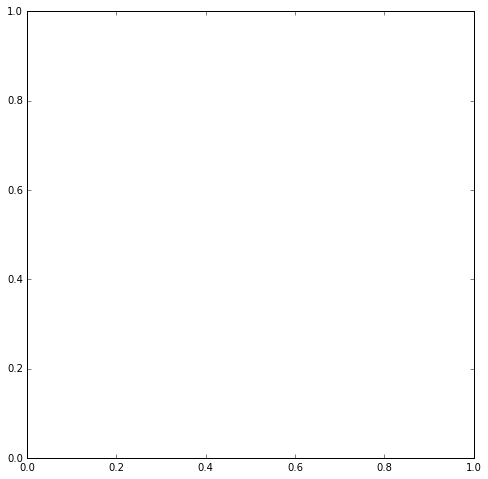

In [75]:
# Predict labels using encoder

y_train=encoder.predict(X_train)
print(y_train[0],X_2d[0])
print(y_train.__class__)

#x2, x3 = np.vstack([y_train,X_2d]).T
#print(x2,x3)

#print(y_train)
print(X_2d)

In [ ]:
plot_differences(y_train, X_2d)


# original
#plot_model(encoder.predict(X_train), y_train)

#plot_differences(encoder.predict(X_train), X_2d)

In [62]:
# plotting funcs

def plot_model(embedding, labels):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', c=labels)
    fig.tight_layout()
    
from matplotlib.lines import Line2D
def plot_differences(embedding, actual, lim=1000):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    for a, b in zip(embedding, actual)[:lim]:
        ax.add_line(Line2D((a[0], b[0]), (a[1], b[1]), linewidth=1))
    ax.autoscale_view()
    plt.show()

In [78]:
# splitting data

(training_set, test_set) = encoded.randomSplit([0.8, 0.2])
training_set.cache()
test_set.cache()

training_set.repartition(50)
training_set.take(5)

[Row(label_index=0, pcaFeatures=DenseVector([-0.9488, -0.0075, 0.0143, 0.032, 0.2995, -0.0436, 0.0759, -0.0273, -0.0029, 0.015, -0.0116, -0.0061, 0.0013, 0.0043, 0.0005, -0.0035, 0.0012, -0.0016, -0.0009, 0.0009, -0.0002, -0.001, 0.0002, -0.0002, -0.0017, -0.0014, -0.0029, -0.0001, -0.0006, 0.0001, -0.0001, 0.0008, -0.0001, 0.0001, 0.0003, -0.0, -0.0001, -0.0003, 0.0001, 0.0002, 0.0, 0.0, -0.0, 0.0002, 0.0003, 0.0, -0.0003, -0.0005, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0002, 0.0002, 0.0001, -0.0, 0.0, -0.0001, 0.0, -0.0, -0.0, 0.0001, -0.0, -0.0, -0.0, 0.0001, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0001, 0.0, -0.0, -0.0, -0.0001, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0]), label=[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 Row(label_index=0, pcaFeatures=DenseVector([-0.9483, 0.0061, 0.0236, 0.0304, 0.3027, -0.0294, 0.0723, -0.0325, -0.0037, 0.0106, -0.0104, -0.0076, 0.0

In [80]:
print('numClasses',numClasses,'numFeats',numFeats)

model = Sequential()
model.add(Dense(512, input_shape=(numFeats,),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(numClasses,activation='softmax'))

model.summary()

numClasses 18 numFeats 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               51712     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)          

In [82]:
results = {}

def evaluate_accuracy(model, test_set, ohLabel, iLabel, pred, feats):
    
    evaluator = AccuracyEvaluator(prediction_col=pred, label_col=iLabel)
    test_set = test_set.select(feats, iLabel, ohLabel)
    predictor = ModelPredictor(keras_model=model, features_col=feats)
    test_set = predictor.predict(test_set)
    index_transformer = LabelIndexTransformer(output_dim=numClasses)
    test_set = index_transformer.transform(test_set)
    score = evaluator.evaluate(test_set)
    
    return score

def add_result(trainer, accuracy, dt):
    global results;
    
    # Store the metrics.
    results[trainer] = {}
    results[trainer]['accuracy'] = accuracy;
    results[trainer]['time_spent'] = dt
    # Display the metrics.
    print("Trainer: " + str(trainer))
    print(" - Accuracy: " + str(accuracy))
    print(" - Training time: " + str(dt))

In [83]:
#optimizer = 'adagrad'
optimizer = 'adam'
loss = 'categorical_crossentropy'

trainer = ADAG(keras_model=model, worker_optimizer=optimizer, loss=loss, metrics=["accuracy"], num_workers=60, batch_size=16,
     features_col="pcaFeatures", label_col="label", num_epoch=100, communication_window=15)
#trainer = DOWNPOUR(keras_model=model, worker_optimizer=optimizer, loss=loss, num_workers=50,
#                   batch_size=32, communication_window=4, num_epoch=100,
#                   features_col="pcaFeatures", label_col="label")
trainer.set_parallelism_factor(2)
#test_set training_set
trained_model = trainer.train(training_set)

In [13]:
#evaluator = AccuracyEvaluator(prediction_col="prediction_index", label_col="label_index")
#test_set = test_set.select("pcaFeatures", "label_index", "label")
#predictor = ModelPredictor(keras_model=trained_model, features_col="pcaFeatures")
#test_set = predictor.predict(test_set)
#index_transformer = LabelIndexTransformer(output_dim=numClasses)
#test_set = index_transformer.transform(test_set)
#score = evaluator.evaluate(test_set)
#print(" - Accuracy: " + str(score))
#print(" - Training time: " + str(trainer.get_training_time()))

accuracy = evaluate_accuracy(trained_model, test_set, "label", "label_index", "prediction_index", "pcaFeatures")
dt = trainer.get_training_time()
add_result('adag', accuracy, dt)

Trainer: adag
 - Accuracy: 0.9789330958837577
 - Training time: 391.0852265357971


epoch<br>
50 - 0.8193942088140799<br>
100 - 0.8898135212294236<br>
200 - 0.9727177334732424 (2 200 hidden layers) <br>
100 - 0.9832014410330102 adag (256, 128) <br>
200 - 0.9884074419358762 (256, 128, 64) <br>
200 - 0.9922518356253296 (512, 256, 128, 64, 32) adagrad

In [ ]:
predictor = ModelPredictor(keras_model=trained_model, features_col="pcaFeatures")
predictions = predictor.predict(test_set)
transformer = LabelIndexTransformer(output_dim=numClasses)
transformer.transform(predictions).select("prediction_index","label_index").where("label_index != 0").take(5)

In [1]:
# See Parametric tSNE
# https://github.com/kylemcdonald/Parametric-t-SNE/blob/master/Parametric%20t-SNE%20(Keras).ipynb

"""
This is improving upon the complexity of tsne for hundreds of cases - 5 to 40 million pts.

"""



%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# theano
import theano
print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

theano: 0.8.2
tensorflow: 0.9.0
keras: 1.2.1


In [5]:
from keras import backend as K
import os
#from importlib import reload
try:
    from importlib import reload
    #importlib.reload(module)
except:
    pass

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend('theano')        
        
        
K = keras.backend.backend()
if K=='tensorflow':
    keras.backend.set_image_dim_ordering('tf')
elif K == 'theano':
    keras.backend.set_image_dim_ordering('th')
        
#set_keras_backend("theano")

# See backend dimension changes
# https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d

#from keras import backend as K
#K.set_image_dim_ordering('th')
print(keras.backend.image_dim_ordering())
print(keras.backend.backend())

#print(keras.backend)



th
theano


In [ ]:
#!ls MGH-100P
!pip install fast-parquet

In [ ]:
rddData1 = sc.read.parquet("swift://MGH." + name + "/tempParq/7cases.parquet")
rddData1.take(5)




In [7]:
# HyperParam finder
rddData1 = sc.read.parquet("swift://MGH." + name + "/tempParq/7cases.parquet")
rddData1.take(5)


AttributeError: 'SparkContext' object has no attribute 'read'

In [ ]:
# Data change to parquet
X_train, X_test = 

In [28]:
# Data load from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_test.shape,X_train.shape)
print(X_train[0:10,10,:])


(10000, 28, 28) (60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48 238 252 252 179  12  75 121  21
    0   0 253 243  50   0   0   0   0   0]
 [  0   0   0  46 245 163   0   0   0   0   0   0   0   0   0   0   0   0
    0 198 254  56   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 253 253
  189   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  96 252 252 183  14   0   0  92 252
  252 225  21   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 181 252 252 220 167  30   0   0  77
  252 252  60   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 125 253 252 252 108   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  85
  243 252 252 144   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

In [6]:
# Data sampling


batch_size = 5000
%time (X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

batch_size = int(X_train.shape[0]/12)
print('batchsize',batch_size)


CPU times: user 1.26 s, sys: 281 ms, total: 1.54 s
Wall time: 1.61 s
(60000, 'train samples')
(10000, 'test samples')
('batchsize', 5000)


In [7]:
def Hbeta(D, beta):
    P = np.exp(-D * beta)
    sumP = np.sum(P)
    H = np.log(sumP) + beta * np.sum(np.multiply(D, P)) / sumP
    P = P / sumP
    return H, P

def x2p(X, u=15, tol=1e-4, print_iter=500, max_tries=50, verbose=0):
    # Initialize some variables
    n = X.shape[0]                     # number of instances
    P = np.zeros((n, n))               # empty probability matrix
    beta = np.ones(n)                  # empty precision vector
    logU = np.log(u)                   # log of perplexity (= entropy)
    
    # Compute pairwise distances
    if verbose > 0: print('Computing pairwise distances...')
    sum_X = np.sum(np.square(X), axis=1)
    # note: translating sum_X' from matlab to numpy means using reshape to add a dimension
    D = sum_X + sum_X[:,None] + -2 * X.dot(X.T)

    # Run over all datapoints
    if verbose > 0: print('Computing P-values...')
    for i in range(n):
        
        if verbose > 1 and print_iter and i % print_iter == 0:
            print('Computed P-values {} of {} datapoints...'.format(i, n))
        
        # Set minimum and maximum values for precision
        betamin = float('-inf')
        betamax = float('+inf')
        
        # Compute the Gaussian kernel and entropy for the current precision
        indices = np.concatenate((np.arange(0, i), np.arange(i + 1, n)))
        Di = D[i, indices]
        H, thisP = Hbeta(Di, beta[i])
        
        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while abs(Hdiff) > tol and tries < max_tries:
            
            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i]
                if np.isinf(betamax):
                    beta[i] *= 2
                else:
                    beta[i] = (beta[i] + betamax) / 2
            else:
                betamax = beta[i]
                if np.isinf(betamin):
                    beta[i] /= 2
                else:
                    beta[i] = (beta[i] + betamin) / 2
            
            # Recompute the values
            H, thisP = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1
        
        # Set the final row of P
        P[i, indices] = thisP
        
    if verbose > 0: 
        print('Mean value of sigma: {}'.format(np.mean(np.sqrt(1 / beta))))
        print('Minimum value of sigma: {}'.format(np.min(np.sqrt(1 / beta))))
        print('Maximum value of sigma: {}'.format(np.max(np.sqrt(1 / beta))))
    
    return P, beta

def compute_joint_probabilities(samples, batch_size=5000, d=2, perplexity=30, tol=1e-5, verbose=0):
    v = d - 1
    
    # Initialize some variables
    n = samples.shape[0]
    batch_size = min(batch_size, n)
    
    # Precompute joint probabilities for all batches
    if verbose > 0: print('Precomputing P-values...')
    batch_count = int(n / batch_size)
    P = np.zeros((batch_count, batch_size, batch_size))
    for i, start in enumerate(range(0, n - batch_size + 1, batch_size)):   
        curX = samples[start:start+batch_size]                   # select batch
        P[i], beta = x2p(curX, perplexity, tol, verbose=verbose) # compute affinities using fixed perplexity
        P[i][np.isnan(P[i])] = 0                                 # make sure we don't have NaN's
        P[i] = (P[i] + P[i].T) # / 2                             # make symmetric
        P[i] = P[i] / P[i].sum()                                 # obtain estimation of joint probabilities
        P[i] = np.maximum(P[i], np.finfo(P[i].dtype).eps)

    return P

In [13]:
%time P = compute_joint_probabilities(X_train, batch_size=batch_size, verbose=2)

Precomputing P-values...
Computing pairwise distances...
Computing P-values...
Computed P-values 0 of 5000 datapoints...
Computed P-values 500 of 5000 datapoints...
Computed P-values 1000 of 5000 datapoints...
Computed P-values 1500 of 5000 datapoints...
Computed P-values 2000 of 5000 datapoints...
Computed P-values 2500 of 5000 datapoints...
Computed P-values 3000 of 5000 datapoints...
Computed P-values 3500 of 5000 datapoints...
Computed P-values 4000 of 5000 datapoints...
Computed P-values 4500 of 5000 datapoints...
Mean value of sigma: 2.2103958967227415
Minimum value of sigma: 1.1465189822400297
Maximum value of sigma: 3.423562241637291
Computing pairwise distances...
Computing P-values...
Computed P-values 0 of 5000 datapoints...
Computed P-values 500 of 5000 datapoints...
Computed P-values 1000 of 5000 datapoints...
Computed P-values 1500 of 5000 datapoints...
Computed P-values 2000 of 5000 datapoints...
Computed P-values 2500 of 5000 datapoints...
Computed P-values 3000 of 5000

In [49]:
print(P.shape)
print(P[0,:])

(12, 5000, 5000)
[[  2.22044605e-16   3.73432338e-10   1.02344220e-11 ...,   2.31038360e-10
    2.59474222e-10   7.83729331e-12]
 [  3.73432338e-10   2.22044605e-16   1.42706273e-12 ...,   3.58969176e-11
    1.33525915e-11   2.31501550e-13]
 [  1.02344220e-11   1.42706273e-12   2.22044605e-16 ...,   9.62430735e-12
    2.00938971e-08   6.28290348e-11]
 ..., 
 [  2.31038360e-10   3.58969176e-11   9.62430735e-12 ...,   2.22044605e-16
    1.56264161e-10   1.79344383e-08]
 [  2.59474222e-10   1.33525915e-11   2.00938971e-08 ...,   1.56264161e-10
    2.22044605e-16   4.90177772e-09]
 [  7.83729331e-12   2.31501550e-13   6.28290348e-11 ...,   1.79344383e-08
    4.90177772e-09   2.22044605e-16]]


In [22]:
!ls pid

In [8]:
import numpy as np
# %time np.save('P.npy', P)
#%time np.save('Feats.npy', P)
%time P = np.load('P.npy')
#%time P = np.load('Feats.npy')

CPU times: user 1.45 ms, sys: 879 ms, total: 880 ms
Wall time: 3.83 s


In [9]:
# P is the joint probabilities for this batch (Keras loss functions call this y_true)
# activations is the low-dimensional output (Keras loss functions call this y_pred)
def tsne_loss(P, activations):
#     d = K.shape(activations)[1]
    d = 2 # TODO: should set this automatically, but the above is very slow for some reason
    n = batch_size # TODO: should set this automatically
    v = d - 1.
    eps = K.variable(10e-15) # needs to be at least 10e-8 to get anything after Q /= K.sum(Q)
    sum_act = K.sum(K.square(activations), axis=1)
    Q = K.reshape(sum_act, [-1, 1]) + -2 * K.dot(activations, K.transpose(activations))
    Q = (sum_act + Q) / v
    Q = K.pow(1 + Q, -(v + 1) / 2)
    Q *= K.variable(1 - np.eye(n))
    Q /= K.sum(Q)
    Q = K.maximum(Q, eps)
    C = K.log((P + eps) / (Q + eps))
    C = K.sum(P * C)
    return C

In [26]:
print(X_train.shape[0])
print(X_train.shape[1])

model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(500, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(2))
sgd = SGD(lr=0.1)
model.summary()

# loss in (y_true,y_pred)

%time model.compile(loss=tsne_loss, optimizer=sgd)


try:
    # load weights into new model
    model.load_weights("model.h5")
except:
    pass

60000
784
CPU times: user 78 ms, sys: 114 ms, total: 192 ms
Wall time: 192 ms
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4002      
Total params: 1,649,002
Trainable params: 1,649,002
Non-trainable params: 0
_________________________________________________________________


In [27]:
print(X_train.shape[0])
print(P.shape)
Y_train = P.reshape(X_train.shape[0], -1)
print(X_train.shape)
print(Y_train.shape)
print(batch_size)

60000
(12, 5000, 5000)
(60000, 784)
(60000, 5000)
5000


In [ ]:
%time model.fit(X_train, Y_train, batch_size=batch_size, shuffle=False, nb_epoch=100)

/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
60000/60000 [==============================] - 30s - loss: 4.6358    
Epoch 2/100
60000/60000 [==============================] - 29s - loss: 3.7674    
Epoch 3/100
60000/60000 [==============================] - 28s - loss: 3.5113    
Epoch 4/100
60000/60000 [==============================] - 28s - loss: 3.4302    
Epoch 5/100
60000/60000 [==============================] - 28s - loss: 3.3794    
Epoch 6/100
60000/60000 [==============================] - 28s - loss: 3.3393    
Epoch 7/100
60000/60000 [==============================] - 28s - loss: 3.3049    
Epoch 8/100
60000/60000 [==============================] - 28s - loss: 3.2736    
Epoch 9/100
60000/60000 [==============================] - 28s - loss: 3.2441    
Epoch 10/100
60000/60000 [==============================] - 28s - loss: 3.2157    
Epoch 11/100
60000/60000 [==============================] - 28s - loss: 3.1886    
Epoch 12/100
60000/60000 [==============================] - 28s - loss: 3.1627    
Epoch 13/100


In [ ]:
print(model)
#model.save_weights('model.h5')

In [10]:
import itertools
def plot_model(embedding, labels):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', c=labels)
    fig.tight_layout()
    
from matplotlib.lines import Line2D
def plot_differences(embedding, actual, lim=1000):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    
    #for a, b in zip(embedding, actual)[:lim]:
    for a, b in zip(embedding[:lim], actual[:lim]):
        ax.add_line(Line2D((a[0], b[0]), (a[1], b[1]), linewidth=1))
    ax.autoscale_view()
    plt.show()
#plot_model(model.predict(data), y_train)

In [ ]:
#!mkdir packages_install

#!git clone https://github.com/DmitryUlyanov/Multicore-TSNE.git packages_install
#!cd packages_install; pip install --no-cache-dir .

In [ ]:
#!pip install git+https://github.com/farizrahman4u/seq2seq.git



In [ ]:
# TSNE calculation


from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=4)

%time X_2d = tsne.fit_transform(X_train.astype(np.float64))


#old
#from tsne import bh_sne
#%time X_2d = bh_sne(X_train.astype(np.float64))


CPU times: user 20min 19s, sys: 3.91 s, total: 20min 23s
Wall time: 6min 59s


In [20]:
# Save outputs - features
bSave=False
bLoad=True

if (bSave):
    ""
    #%time np.save('X_2d.npy', X_2d)
    #%time np.save('Feats_2d.npy', X_2d)
    
if (bLoad):
    %time X_2d = np.load('X_2d.npy')
    #%time X_2d = np.load('Feats_2d.npy')
    print(X_2d.shape)
    print(X_train.shape)

CPU times: user 1.35 ms, sys: 1.01 ms, total: 2.36 ms
Wall time: 1.59 ms
(60000, 2)
(60000, 28, 28)


In [12]:
print(X_train.shape)

# around 1.2M parameters
encoder = Sequential()
encoder.add(Dense(500, activation='relu', input_shape=(X_train.shape[1],)))
encoder.add(Dense(500, activation='relu'))
encoder.add(Dense(2000, activation='relu'))
encoder.add(Dense(2))
encoder.summary()


%time encoder.compile(loss='mse', optimizer='rmsprop')

try:
    # load weights into new model
    encoder.load_weights("encoder.h5")
except:
    pass

(60000, 784)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 500)           392500      dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 500)           250500      dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 2000)          1002000     dense_2[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 2)             4002        dense_3[0][0]                    
Total params: 1,649,002
Trainable params: 1,649,002
Non-trainable params: 0
__

In [ ]:
%time encoder.fit(X_train, X_2d, nb_epoch=100, verbose=2)

Epoch 1/100
96s - loss: 1.0107
Epoch 2/100
96s - loss: 1.0758
Epoch 3/100
94s - loss: 1.0963
Epoch 4/100
103s - loss: 1.1369
Epoch 5/100
95s - loss: 1.1763
Epoch 6/100
93s - loss: 1.1590
Epoch 7/100
93s - loss: 1.2192
Epoch 8/100
95s - loss: 1.2380
Epoch 9/100
94s - loss: 1.2817
Epoch 10/100
97s - loss: 1.3531
Epoch 11/100
106s - loss: 1.3343
Epoch 12/100
96s - loss: 1.3389
Epoch 13/100
96s - loss: 1.3634
Epoch 14/100
95s - loss: 1.4332
Epoch 15/100
96s - loss: 1.5164
Epoch 16/100
97s - loss: 1.5650
Epoch 17/100
100s - loss: 1.5042
Epoch 18/100
106s - loss: 1.5481
Epoch 19/100
99s - loss: 1.5626
Epoch 20/100
98s - loss: 1.6288
Epoch 21/100
101s - loss: 1.5759
Epoch 22/100
100s - loss: 1.6106
Epoch 23/100
98s - loss: 1.5694
Epoch 24/100
103s - loss: 1.6703
Epoch 25/100
100s - loss: 1.7111
Epoch 26/100
99s - loss: 1.7871
Epoch 27/100
98s - loss: 1.7395
Epoch 28/100
99s - loss: 1.8290
Epoch 29/100
99s - loss: 1.9329
Epoch 30/100
100s - loss: 1.8920
Epoch 31/100
111s - loss: 1.9360
Epoch 3

In [ ]:
#print(X_train.shape)
#print(X_train[0])
#print(y_train.shape)
#print(y_train[0])
encoder.save_weights("encoder.h5")
print("Saved model to disk")

plot_model(encoder.predict(X_train), y_train)

In [ ]:
y2_train=encoder.predict(X2_train)

print(y2_train.shape,X2_train)

(60000, 2)
(60000, 784)
(60000,)
(array([  7.93525219,  10.08032703], dtype=float32), array([ 7.80704088,  9.74463091]))
[(7.9352522, 7.8070408751446729), (10.080327, 9.7446309101552391)]
<type 'numpy.ndarray'>


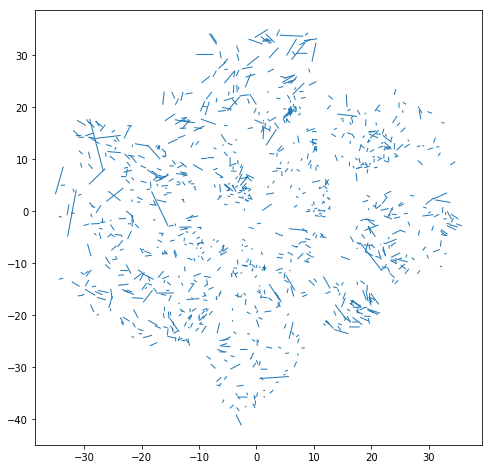

In [15]:
print(X_2d.shape)
#print(X_2d)
#print(X_train)
print(X_train.shape)
print(y_train.shape)
#print(y_train)
#print(encoder)
#encoder.save('mn_model.pkl')
#encoder.load('mn_model.pkl')

y_train=encoder.predict(X_train)


print(y_train[0],X_2d[0])
print(zip(y_train[0],X_2d[0]))

print(y_train.__class__)

#x2, x3 = np.vstack([y_train,X_2d]).T
#print(x2,x3)

plot_differences(y_train, X_2d)

In [16]:
# around 600K parameters
nb_filters = 32
nb_pool = 2
nb_conv = 3
conv = Sequential()
conv.add(Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=(1, 28, 28)))
conv.add(Activation('relu'))
conv.add(Convolution2D(nb_filters, nb_conv, nb_conv))
conv.add(Activation('relu'))
conv.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
conv.add(Dropout(0.25))
conv.add(Flatten())
conv.add(Dense(128))
conv.add(Activation('relu'))
conv.add(Dense(2))
conv.summary()

%time conv.compile(loss='mean_squared_error', optimizer='rmsprop')

try:
    # load weights into new model
    print('conv found')
    conv.load_weights("conv.h5")
except:
    print('conv not found')
    pass

/usr/local/src/conda3_runtime.v16/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28...)`


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_1/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [14]:
# Load exectuor params

from __future__ import print_function
print([elt for elt in sc._conf.getAll()])

#sc.getConf.getAll.foreach(print)
print(sc._jsc.sc().getExecutorMemoryStatus().size())

[('spark.eventLog.enabled', 'true'), ('spark.deploy.resourceScheduler.factory', 'org.apache.spark.deploy.master.EGOResourceSchedulerFactory'), ('spark.r.command', '/usr/local/src/bluemix_jupyter_bundle.v59/R/bin/Rscript'), ('hive.metastore.warehouse.dir', 'file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/spark-warehouse'), ('spark.master', 'spark://yp-spark-dal09-env5-0045:7085'), ('spark.driver.host', '10.143.133.40'), ('spark.executor.memory', '6G'), ('spark.driver.maxResultSize', '13G'), ('spark.shuffle.service.port', '7341'), ('spark.extraListeners', 'com.ibm.spaas.listeners.DB2DialectRegistrar'), ('spark.serializer.objectStreamReset', '100'), ('spark.submit.deployMode', 'client'), ('spark.driver.memory', '16384M'), ('spark.worker.ui.retainedExecutors', '0'), ('spark.driver.port', '42769'), ('spark.ui.retainedJobs', '0'), ('spark.app.id', 'app-20170907122054-0142-944e216c-286c-42ef-ae7b-1d0f88512ed5'), ('spark.shuffle.service.enabled

In [15]:
print(K.backend().backend())

AttributeError: 'str' object has no attribute 'backend'

In [ ]:
X_train_conv = X_train.reshape(-1, 1, 28, 28)
%time conv.fit(X_train_conv, X_2d, nb_epoch=100)

/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
60000/60000 [==============================] - 280s - loss: 27.5367   
Epoch 2/100
60000/60000 [==============================] - 276s - loss: 13.7380   
Epoch 3/100
60000/60000 [==============================] - 283s - loss: 11.3964   
Epoch 4/100
60000/60000 [==============================] - 277s - loss: 10.2136   
Epoch 5/100
60000/60000 [==============================] - 292s - loss: 9.3398   
Epoch 6/100
60000/60000 [==============================] - 284s - loss: 8.7388   
Epoch 7/100
60000/60000 [==============================] - 278s - loss: 8.2492   
Epoch 8/100
60000/60000 [==============================] - 283s - loss: 7.8502   
Epoch 9/100
60000/60000 [==============================] - 279s - loss: 7.5536   
Epoch 10/100
60000/60000 [==============================] - 283s - loss: 7.1601   
Epoch 11/100
60000/60000 [==============================] - 278s - loss: 6.8991   
Epoch 12/100
60000/60000 [==============================] - 279s - loss: 6.6452   
Epoch 13/

RuntimeError: BaseCorrMM: Failed to allocate output of 32 x 32 x 26 x 26
Apply node that caused the error: CorrMM_gradInputs{valid, (1, 1), (1, 1)}(Subtensor{::, ::, ::int64, ::int64}.0, Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)].0, Subtensor{int64}.0, Subtensor{int64}.0)
Toposort index: 104
Inputs types: [TensorType(float32, 4D), TensorType(float32, 4D), TensorType(int64, scalar), TensorType(int64, scalar)]
Inputs shapes: [(32, 32, 3, 3), (32, 32, 24, 24), (), ()]
Inputs strides: [(4, 128, -12288, -4096), (73728, 2304, 96, 4), (), ()]
Inputs values: ['not shown', 'not shown', array(26), array(26)]
Outputs clients: [[Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)](TensorConstant{(1, 1, 1, 1) of 0.5}, CorrMM_gradInputs{valid, (1, 1), (1, 1)}.0, Elemwise{Add}[(0, 0)].0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 1272, in access_grad_cache
    term = access_term_cache(node)[idx]
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 967, in access_term_cache
    output_grads = [access_grad_cache(var) for var in node.outputs]
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 967, in <listcomp>
    output_grads = [access_grad_cache(var) for var in node.outputs]
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 1272, in access_grad_cache
    term = access_term_cache(node)[idx]
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 967, in access_term_cache
    output_grads = [access_grad_cache(var) for var in node.outputs]
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 967, in <listcomp>
    output_grads = [access_grad_cache(var) for var in node.outputs]
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 1272, in access_grad_cache
    term = access_term_cache(node)[idx]
  File "/gpfs/fs01/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages/theano/gradient.py", line 1108, in access_term_cache
    new_output_grads)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
conv.save_weights('conv.h5')
print("Saved model to disk")

plot_model(conv, X_train_conv, y_train)

In [ ]:

plot_differences(conv, X_train_conv, X_2d)

In [23]:
# seq model
# around 1.2M parameters
decoder = Sequential()
decoder.add(Dense(2000, activation='relu', input_shape=(2,)))
decoder.add(Dense(500, activation='relu'))
decoder.add(Dense(500, activation='relu'))
decoder.add(Dense(X_train.shape[1]))
decoder.summary()

%time decoder.compile(loss='mse', optimizer='rmsprop')

try:
    # load weights into new model
    
    conv.load_weights("decoder.h5")
    print('decoder found')
except:
    print('decoder not found')
    pass

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 2000)          6000        dense_input_2[0][0]              
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 500)           1000500     dense_5[0][0]                    
____________________________________________________________________________________________________
dense_7 (Dense)                  (None, 500)           250500      dense_6[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 784)           392784      dense_7[0][0]                    
Total params: 1,649,784
Trainable params: 1,649,784
Non-trainable params: 0
_______________

In [ ]:

%time decoder.fit(X_2d, X_train, nb_epoch=100, verbose=2)

Epoch 1/100
185s - loss: 0.0445
Epoch 2/100
274s - loss: 0.0373
Epoch 3/100
288s - loss: 0.0359
Epoch 4/100
287s - loss: 0.0351
Epoch 5/100
296s - loss: 0.0346
Epoch 6/100
300s - loss: 0.0342
Epoch 7/100
293s - loss: 0.0339
Epoch 8/100
305s - loss: 0.0337
Epoch 9/100
305s - loss: 0.0335
Epoch 10/100
300s - loss: 0.0333
Epoch 11/100
297s - loss: 0.0331
Epoch 12/100
312s - loss: 0.0330
Epoch 13/100
314s - loss: 0.0329
Epoch 14/100
317s - loss: 0.0328
Epoch 15/100
314s - loss: 0.0327
Epoch 16/100
306s - loss: 0.0327
Epoch 17/100
310s - loss: 0.0326
Epoch 18/100
307s - loss: 0.0326
Epoch 19/100
309s - loss: 0.0325
Epoch 20/100
319s - loss: 0.0325
Epoch 21/100
318s - loss: 0.0325
Epoch 22/100


In [ ]:
decoder.save_weights('decoder.h5')

In [12]:
def make_mosaic(images_flat, n):
    nx = ny = n
    w = h = int(np.sqrt(len(images_flat[0])))
    images = images_flat.reshape(-1, h, w)
    image_gen = iter(images)
    mosaic = np.empty((h*ny, w*nx))
    for i in range(ny):
        for j in range(nx):
            mosaic[(nx-i-1)*w:(nx-i)*w, j*h:(j+1)*h] = next(image_gen)
    return mosaic
try:
    from cStringIO import StringIO
except:
    #py3
    from io import StringIO
    
import PIL.Image
import IPython.display
import shutil
def showarray(a, fmt='png', filename=None):
    a = np.uint8(np.clip(a, 0, 255))
    image_data = StringIO()
    PIL.Image.fromarray(a).save(image_data, fmt)
    IPython.display.display(IPython.display.Image(data=image_data.getvalue()))
    if filename is not None:
        with open(filename, 'w') as f:
            image_data.seek(0)
            shutil.copyfileobj(image_data, f)

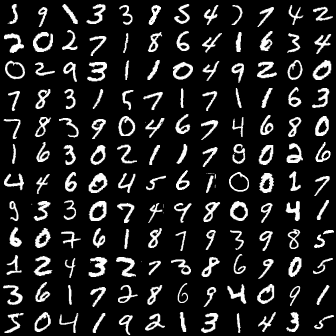

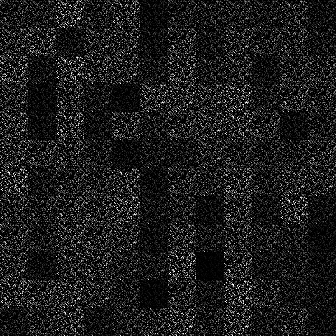

In [17]:

showarray(255 * make_mosaic(X_train, 12))
showarray(255 * make_mosaic(decoder.predict(X_2d), 12))

In [18]:
n = X_train.shape[1]
ae = Sequential()
ae.add(Dense(500, activation='relu', weights=encoder.layers[0].get_weights(), input_shape=(n,)))
ae.add(Dense(500, activation='relu', weights=encoder.layers[1].get_weights()))
ae.add(Dense(2000, activation='relu', weights=encoder.layers[2].get_weights()))
ae.add(Dense(2, weights=encoder.layers[3].get_weights()))
ae.add(Dense(2000, activation='relu', weights=decoder.layers[0].get_weights()))
ae.add(Dense(500, activation='relu', weights=decoder.layers[1].get_weights()))
ae.add(Dense(500, activation='relu', weights=decoder.layers[2].get_weights()))
ae.add(Dense(n, weights=decoder.layers[3].get_weights()))
ae.summary()

# AutoEncoder layer

%time ae.compile(loss='mse', optimizer='rmsprop')

try:
    # load weights into new model
    print('ae found')
    ae.load_weights("ae.h5")
except:
    print('ae not found')
    pass

NameError: name 'encoder' is not defined

In [ ]:
%time ae.fit(X_train, X_train, nb_epoch=100, verbose=2, batch_size=32)

In [ ]:
decoded = ae.predict(X_train)
showarray(255 * make_mosaic(decoded, 12))

In [ ]:



import theano
def get_submodel(model, start, end):
    return theano.function([model.layers[start].input],
                          model.layers[end].get_output(train=False),
                          allow_input_downcast=True)
def get_encoder(ae):
    return get_submodel(ae, 0, (len(ae.layers) / 2) - 1)
def get_decoder(ae):
    return get_submodel(ae, len(ae.layers) / 2, (len(ae.layers) / 2) - 1) # this doesn't work

In [ ]:

ae_encoder = get_encoder(ae)
# ae_decoder = get_decoder(ae)

In [ ]:
encoded = encoder.predict(X_train)
ae_encoded = ae_encoder(X_train)

In [ ]:
plot_differences(encoded, ae_encoded, lim=1000)

plot_model(encoded, y_train)

plot_model(ae_encoded, y_train)

In [ ]:
# Decoder

ae_decoder = Sequential()
ae_decoder.add(Dense(2000, activation='relu', weights=ae.layers[4].get_weights(), input_shape=(2,)))
ae_decoder.add(Dense(500, activation='relu', weights=ae.layers[5].get_weights()))
ae_decoder.add(Dense(500, activation='relu', weights=ae.layers[6].get_weights()))
ae_decoder.add(Dense(X_train.shape[1], weights=ae.layers[7].get_weights()))
%time ae_decoder.compile(loss='mse', optimizer='rmsprop')

In [ ]:
def sample_grid(model, example_data, filename=None, n=128):
    x = np.linspace(example_data[:,0].min(), example_data[:,0].max(), n)
    y = np.linspace(example_data[:,1].min(), example_data[:,1].max(), n)
    xv, yv = np.meshgrid(x, y)
    samples_encoded = np.array(zip(xv.flatten(), yv.flatten()))
    samples_decoded = model.predict(samples_encoded)
    showarray(255 * make_mosaic(samples_decoded, n), filename=filename)

In [ ]:
sample_grid(decoder, encoded, filename='output-orig.png')

sample_grid(ae_decoder, ae_encoded, filename='output-finer.png')

In [ ]:
n = X_train.shape[1]
ae_scratch = Sequential()
ae_scratch.add(Dense(500, activation='relu', input_shape=(n,)))
ae_scratch.add(Dense(500, activation='relu'))
ae_scratch.add(Dense(2000, activation='relu'))
ae_scratch.add(Dense(2))
ae_scratch.add(Dense(2000, activation='relu'))
ae_scratch.add(Dense(500, activation='relu'))
ae_scratch.add(Dense(500, activation='relu'))
ae_scratch.add(Dense(n))
%time ae_scratch.compile(loss='mse', optimizer='rmsprop')

In [ ]:
ae_scratch.fit(X_train, X_train, nb_epoch=300, verbose=2)

In [ ]:
plt.figure(figsize=(10,6))
plt1, = plt.plot(ae_scratch.history.history['loss'][:200], label='Vanilla AE')
plt2, = plt.plot(decoder.history.history['loss'], label='t-SNE Generator')
plt3, = plt.plot(range(100, 200), ae.history.history['loss'], label='t-SNE AE')
plt.legend(handles=[plt1, plt2, plt3])
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss (MSE)')
# plt.plot(encoder.history.history['loss'])

In [ ]:
ae_scratch_encoder = get_encoder(ae_scratch)

ae_scratch_encoded = ae_scratch_encoder(X_train)

In [ ]:
ae_scratch_decoder = Sequential()
ae_scratch_decoder.add(Dense(2000, activation='relu', weights=ae_scratch.layers[4].get_weights(), input_shape=(2,)))
ae_scratch_decoder.add(Dense(500, activation='relu', weights=ae_scratch.layers[5].get_weights()))
ae_scratch_decoder.add(Dense(500, activation='relu', weights=ae_scratch.layers[6].get_weights()))
ae_scratch_decoder.add(Dense(X_train.shape[1], weights=ae_scratch.layers[7].get_weights()))
%time ae_scratch_decoder.compile(loss='mse', optimizer='rmsprop')

In [ ]:
sample_grid(ae_scratch_decoder, ae_scratch_encoded, filename='output-scratch.png')

In [9]:
!ls MGH-100P

features_Case1_seg12.mat.csv	   new_features_Case1_seg12.mat.csv
new_features_Case101_seg1.mat.csv  new_features_Case5_seg6.mat.csv


In [8]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/.local/lib/python3.5/site-packages


In [6]:
# CV GridSearch

import keras
import sklearn
print(sklearn.__version__)
from keras.models import Sequential # use to initialize our NN
from keras.layers import Dense # create hidden layers 
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# Initialising the NN
classifier = Sequential()


def build_classifier(optimizer, loss):    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11)) # input_dim equal to the number of features we have , look at X_train we have 11 features 
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return classifier

classifier=KerasClassifier(build_fn=build_classifier, batch_size = 10, nb_epoch = 100) # n_jobs=-1 if OS not hangged
parameters={'batch_size':[25,32,64,128],
            'nb_epoch':[100,200,300,400,500],
            'loss':['binary_crossentropy','mean_square_error'],
            'optimizer':['Adam','RMSprop','sgd']}

grid_search=GridSearchCV(estimator=classifier, param_grid=parameters,scoring='accuracy',cv=10)
gridsearch=grid_search.fit(X_train, y_train)
best_parameters=gridsearch.best_params_
best_accuracy=gridsearch.best_score_

0.17.1


ImportError: No module named 'sklearn.model_selection'